# Part 1: Analysis of Brownsville.csv, years 2014-2021

In this notebook, I will be analyzing the Brownsville.csv dataset. This dataset contains information on the buildings which have received complaints in the Brownsville area.<br>
<br>
This is a preliminary analysis, as the team intends to compile a more complete version of the necesary data and I will re-do this analysis with that data.<br>
<br>

The first step is to load up the necessary libraries and the Brownsville.csv dataset. Data cleaning will be done, which will consist of removing duplicates that may interfere with the data analysis and removing N/A rows if necessary.

In [1]:
#loads libraries necesary to analyze dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
brownsville = pd.read_csv("brownsville.csv", parse_dates=["StatusDate"])

#set an option to show full text of each value (helpful for the "StatusDescription" column)
pd.set_option('display.max_colwidth', -1)

#showing dataset to make sure it loaded properly
brownsville

<ipython-input-2-0b12931536b6>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Zip,Borough,BoroughID,BuildingID,ProblemID,ComplaintID,UnitTypeID,UnitType,SpaceTypeID,SpaceType,...,MajorCategoryID,MajorCategory,MinorCategoryID,MinorCategory,CodeID,Code,StatusID,Status,StatusDate,StatusDescription
0,11233,BROOKLYN,3,219263,14570531,6977738,91,APARTMENT,541,BATHROOM,...,65,WATER LEAK,380,HEAVY FLOW,2828,AT WALL OR CEILING,2,CLOSE,2014-07-31,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
1,11212,BROOKLYN,3,283890,14618845,6996145,91,APARTMENT,546,KITCHEN,...,9,PLUMBING,68,WATER SUPPLY,2564,NO WATER,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
2,11212,BROOKLYN,3,283890,14618846,6996145,91,APARTMENT,545,ENTRANCE/FOYER,...,56,DOOR/WINDOW,333,DOOR,2664,BROKEN OR MISSING,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.
3,11212,BROOKLYN,3,283890,14618847,6996145,91,APARTMENT,542,BEDROOM,...,63,UNSANITARY CONDITION,375,MOLD,2817,NaN,2,CLOSE,2014-08-23,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.
4,11233,BROOKLYN,3,330347,14585091,6982717,91,APARTMENT,543,ENTIRE APARTMENT,...,59,HEAT/HOT WATER,348,APARTMENT ONLY,2833,NO HEAT AND NO HOT WATER,2,CLOSE,2014-08-05,"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143682,11212,BROOKLYN,3,309623,21541551,10701702,91,APARTMENT,546,KITCHEN,...,8,APPLIANCE,61,REFRIGERATOR,2622,BROKEN DOOR SEAL,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143683,11212,BROOKLYN,3,309623,21541552,10701702,91,APARTMENT,543,ENTIRE APARTMENT,...,65,WATER LEAK,381,SLOW LEAK,2831,AT WALL OR CEILING,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143684,11212,BROOKLYN,3,309623,21541553,10701702,91,APARTMENT,543,ENTIRE APARTMENT,...,28,PAINT/PLASTER,198,WALL,1364,BULGING/HOLE/CRACKED,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.
143685,11233,BROOKLYN,3,364106,21541604,10701726,92,BUILDING-WIDE,550,BUILDING-WIDE,...,63,UNSANITARY CONDITION,374,GARBAGE/RECYCLING STORAGE,2816,MISSING OR INADEQUATE CANS/LID,1,OPEN,2021-04-30,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.


In [3]:
#Drops duplicate values in "ComplaintID" column
rd = brownsville.drop_duplicates(subset=["ComplaintID"], keep='first', inplace=False)

In [4]:
#Checks how many N/A values are in the dataset
rd.isna().sum().sum()

3756

In [5]:
#Drops NA values from dataset
rdbrownsville = rd.dropna()

Duplicate ComplaintIDs were removed because there were multiple values that repeated. The ProblemIds paired up with the complaint IDs, but they were all unique. N/A values were also dropped, out of 143687 rows total, 3756 were N/A values. 

-----------------------

Here, a new column named "Complaints" will be created to combine the MajorCategories and MinorCategories columns, as having them separated makes them unclear.

In [6]:
#combines "MajorCategory" and "MinorCategory" columns
rdbrownsville["Complaints"] = rdbrownsville["MajorCategory"] + rdbrownsville["MinorCategory"]

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [7]:
#checks how the new columns looks
rdbrownsville["Complaints"].head()

0    WATER LEAKHEAVY FLOW         
1    PLUMBINGWATER SUPPLY         
4    HEAT/HOT WATERAPARTMENT ONLY 
5    WATER LEAKHEAVY FLOW         
7    HEAT/HOT WATERENTIRE BUILDING
Name: Complaints, dtype: object

Here, the new Categories column will be analyzed to see which is highest in reports.  

In [8]:
#lists unique values by amount, from most to least frequent
rdbrownsville["Complaints"].value_counts()

HEAT/HOT WATERENTIRE BUILDING    22291
HEAT/HOT WATERAPARTMENT ONLY     15890
UNSANITARY CONDITIONPESTS        3641 
DOOR/WINDOWDOOR                  2699 
PAINT/PLASTERCEILING             2452 
                                 ...  
APPLIANCEMICROWAVE               1    
ELECTRICELECTRIC-SUPPLY          1    
GENERALFLOOR                     1    
GENERALDOORS                     1    
HEATINGHEAT-PLANT                1    
Name: Complaints, Length: 66, dtype: int64

Text(0.5, 0, 'Complaint')

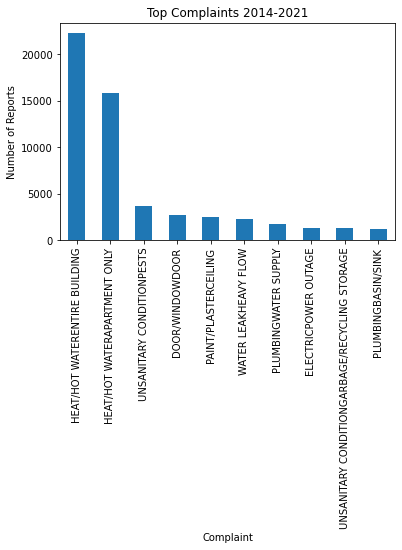

In [9]:
#creating a bar chart to display the top complaints, added .head(10) to shrink results to 10 so it wouldn't be too crowded
com_values = rdbrownsville["Complaints"].value_counts().head(10)
com_values.plot(kind = "bar")
plt.title("Top Complaints 2014-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Complaint")

Checking the Complaints, the top five issues are "HEAT/HOT WATER - ENTIRE BUILDING", "HEAT/HOT WATER - APARTMENT ONLY", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR", and "PAINT/PLASTER - CEILING". Created a bar chart with the top 10 minor categories. 

------------------

Checking building IDs to see which addresses are the most frequently shown in the dataset.

In [10]:
rdbrownsville["BuildingID"].value_counts()

808361    3764
309623    798 
362955    767 
362959    700 
363119    557 
         ...  
314851    1   
232202    1   
975313    1   
334662    1   
364106    1   
Name: BuildingID, Length: 4537, dtype: int64

Text(0.5, 0, 'Building ID')

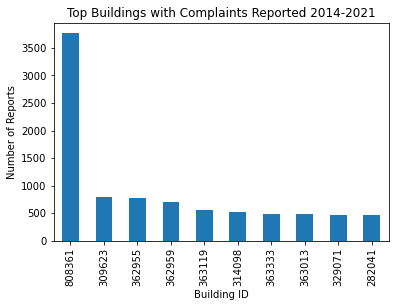

In [11]:
build_values = rdbrownsville["BuildingID"].value_counts().head(10)
build_values.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported 2014-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
362955 - 165 Rockaway Parkway<br>
362959 - 166 Rockaway Parkway<br>
363119 - 214 Rockaway Parkway<br>
314098 - 351 Howard Avenue<br>
363333 - 92 Rockaway Parkway<br>
363013 - 178 Rockaway Parkway<br>
329071 - 210 Lott Avenue<br>
282041 - 327 East 92 Street<br>

------------------------------------------

Status descriptions will be analyzed here. These describe what the Department of Housing Preservation and Development has done about the complaints they have received. This section will re-orginize the statuses and see which messages come up the most frequently. 

In [12]:
rdbrownsville["StatusDescription"].value_counts()

The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                                                                                                                                                                             17934
The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.                                                                                                                                                                                        10269
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following co

There are 21 unique status descriptions when we look at it in its original form, however this version is not ideal for what we want to look at. These messages are long and some are repetative, saying almost the same thing but with only a few different words, so next I will shorten them and sort them to make this column easier to read and code with in the future. 


In [13]:
#this code replaces the text for the selected values; the original texts are too long and some too similar. 
#They will be re-orginazed by this process as well.
rdbrownsville.replace("The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.",
                      "Inspected; no violations issued",
                      inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.", 
           "Inspected; violations issued", 
           inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint.", 
           "Unable to gain access", 
           inplace=True)
rdbrownsville.replace("More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.", 
           "Multiple complaints; tenant confirmed resolved", 
           inplace=True)
rdbrownsville.replace("More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.", 
           "Multiple complaints; tenant confirmed resolved", 
           inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint.", 
           "Single complaint; tenant confirmed resolved", 
           inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.",
                      "Unable to gain access",
                      inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",
                     "Inspected; no violations issued",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.gov/hpd.",
                     "Inspected; violations previously issued",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was unable to access the rooms where the following conditions were reported. No violations were issued. The complaint has been closed.",
                     "Unable to gain access",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",
                     "Single complaint; tenant confirmed resolved",
                      inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was not able to gain access to your apartment to inspect for a lack of heat or hot water. However, HPD was able to verify that heat or hot water was inadequate by inspecting another apartment and a violation was issued. Information about specific violations is available at www.nyc.gov/hpd.",
                     "Unable to gain access; violation issued",
                     inplace=True)
rdbrownsville.replace("The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.",
                     "Complaint remains open",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was not able to gain access to inspect the conditions. If the conditions still exist and an inspection is required, please contact the borough office with your complaint number at",
                     "Unable to gain access",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development responded to a complaint of no heat or hot water. Heat was not required at the time of the inspection. No violations were issued. If the condition still exists, please file a new complaint.",
                     "Inspected; no violations issued",
                     inplace=True)
rdbrownsville.replace("More than one complaint was received for this building-wide condition. This complaint status is for the initial complaint.The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",
                     "Multiple complaints; tenant confirmed resolved",
                     inplace=True)
rdbrownsville.replace("More than one complaint was received for this building-wide condition. This complaint status is for the initial complaint.The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",
                     "Multiple complaints; tenant confirmed resolved",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. However, HPD also identified potential lead-based paint conditions and will attempt to contact you to schedule a follow-up inspection to test the paint for lead. Information about specific violations is available at www.nyc.gov/hpd.",
                     "Inspected; violations issued",
                     inplace=True)
rdbrownsville.replace("More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint. The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.",
                     "Complaint remains open",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development was unable to access the rooms where the following  conditions were reported. No violations were issued. The complaint has been closed.",
                     "Unable to gain access",
                     inplace=True)
rdbrownsville.replace("The Department of Housing Preservation and Development inspected the following conditions. A Section 8 Failure was issued. Both the tenant and the property owner will receive a notice in the mail regarding the details of the Failure and the resulting action by the Agency.",
                     "Inspected; violations issued",
                     inplace=True)

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
rdbrownsville["StatusDescription"].value_counts()

Inspected; no violations issued                   20333
Multiple complaints; tenant confirmed resolved    16671
Unable to gain access                             14374
Inspected; violations issued                      10283
Single complaint; tenant confirmed resolved       7916 
Inspected; violations previously issued           524  
Unable to gain access; violation issued           241  
Complaint remains open                            72   
Name: StatusDescription, dtype: int64

After completing this step, there are 8 message types. This will make it easier to analyze going forward. 

----------------------------

In this section, I will show the top buildings with violations in this timeframe.

In [15]:
bv_buildstatus = rdbrownsville[["BuildingID", "StatusDescription"]]

In [16]:
bv_sd_violation = bv_buildstatus[(bv_buildstatus.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Building ID')

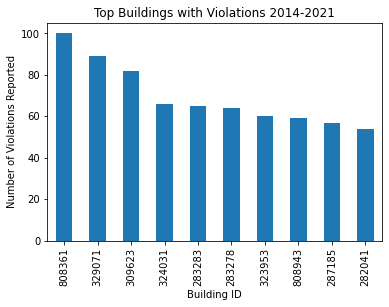

In [17]:
bv_sd_violation_counts = bv_sd_violation["BuildingID"].value_counts().head(10)
bv_sd_violation_counts.plot(kind = "bar")
plt.title("Top Buildings with Violations 2014-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2014 and 2021 are:<br>
808361 - 1711 Fulton Street<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
324031 - 1087 Lenox Road<br>
283283 - 491 East 94 Street<br>
283278 - 480 East 94 Street<br>
323953 - 351 Legion Street<br>
808943 - 37 New Lots Avenue<br>
287185 - 1064 East New York Avenue<br>
282041 - 327 East 92 Street<br>

--------------

Checking the top buildings that could not be accessed after complaints were made.

In [18]:
bv_sd_noaccess = bv_buildstatus[(bv_buildstatus.StatusDescription == "Unable to gain access")]

Text(0.5, 0, 'Building ID')

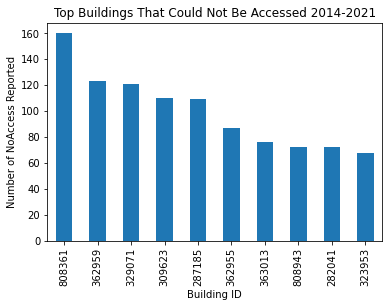

In [19]:
bv_sd_noaccess_counts = bv_sd_noaccess["BuildingID"].value_counts().head(10)
bv_sd_noaccess_counts.plot(kind = "bar")
plt.title("Top Buildings That Could Not Be Accessed 2014-2021")
plt.ylabel("Number of NoAccess Reported")
plt.xlabel("Building ID")

The top buildings that could not be accessed after complaints were made between the years of 2014 and 2021 are:<br>
808361 - 1711 Fulton Street<br>
362959 - 166 Rockaway Parkway<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
287185 - 1064 East New York Avenue<br>
362955 - 165 Rockaway Parkway<br>
363013 - 178 Rockaway Parkway<br>
282041 - 327 East 92 Street<br>
808943 - 37 New Lots Avenue<br>
323953 - 351 Legion Street<br>

-------------------

Here we will look at which complaints are most commonly associated with issued violations. 

In [20]:
bv_complaintstatus = rdbrownsville[["Complaints", "StatusDescription"]]

In [21]:
bv_sd_comviolation = bv_complaintstatus[(bv_complaintstatus.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Complaints')

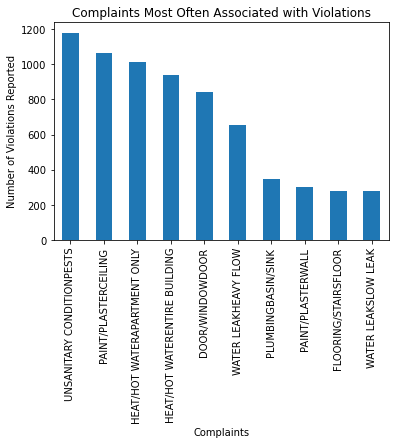

In [22]:
bv_sd_comviolation_counts = bv_sd_comviolation["Complaints"].value_counts().head(10)
bv_sd_comviolation_counts.plot(kind = "bar")
plt.title("Complaints Most Often Associated with Violations")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Complaints")

The most common complaints (MinorCategory column) which lead to a violation being issued are "UNSANITARY CONDITION - PESTS", "PAINT/PLASTER - CEILING", "HEAT/HOT WATER - APARTMENT ONLY", "HEAT/HOT WATER - ENTIRE BUILDING" AND "DOOR/WINDOW - DOOR". 

------------

Here we are taking a look at which complaints are most commonly associated with unaccessed buildings. 

In [23]:
bv_sd_comnoaccess = bv_complaintstatus[(bv_complaintstatus.StatusDescription == 'Unable to gain access')]

Text(0.5, 0, 'Complaints')

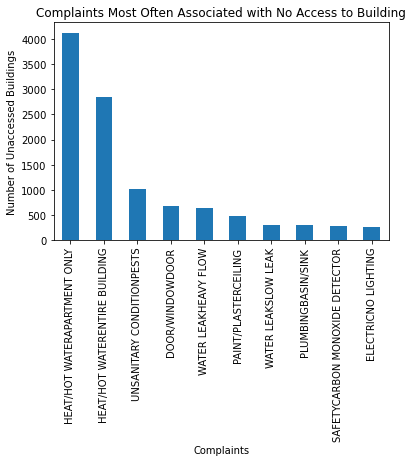

In [24]:
bv_sd_comnoaccess_counts = bv_sd_comnoaccess["Complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts.plot(kind = "bar")
plt.title("Complaints Most Often Associated with No Access to Building")
plt.ylabel("Number of Unaccessed Buildings")
plt.xlabel("Complaints")

The most common complaints associated to a building that was not accessed for inspection are "HEAT/HOT WATER - APARTMENT ONLY", "HEAT/HOT WATER - ENTIRE BUILDING", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR" and "WATER LEAK - HEAVY FLOW".

--------------

In this section, the dates need a little tweaking to make it possible to track the amount of complaints made each month of the year in this dataset.

In [25]:
#labeling each month and getting value counts for each
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
rdbrownsville['StatusDate'] = pd.to_datetime(rdbrownsville['StatusDate'])
rdbrownsville["StatusDateMonth"] = rdbrownsville["StatusDate"].dt.month
month_counts = rdbrownsville["StatusDateMonth"].value_counts()
month_counts.index = month_counts.index.map(month)
month_counts

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


December     9777
January      9250
November     8995
February     8720
March        7029
October      5915
April        4405
August       3654
September    3508
May          3282
July         3098
June         2781
Name: StatusDateMonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

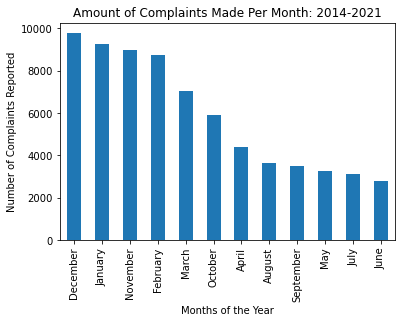

In [26]:
month_counts.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2014-2021")
plt.ylabel("Number of Complaints Reported")
plt.xlabel("Months of the Year")

In this timeframe, the winter months are the ones in which the most complaints are made. 

--------------------

--------------------------

## Part 2: 5 Year Analysis of Brownsville.csv, years 2016-2021

Here, I filtered the years down to a five year timeframe (between the years 2016 and 2021) to see what differences there are from the full timeframe of the dataset. 

In [27]:
#filters dataset to specified time frame (2016-01-01 to 2021-05-01)
bv_5years = rdbrownsville[(rdbrownsville['StatusDate'] > '2016-01-01') & (rdbrownsville['StatusDate'] < '2021-05-01')]

-----------------

Here, the Categories column in this 5 year timeframe will be analyzed to see which has the highest amount of reports.  

In [28]:
bv_5years["Complaints"].value_counts().head(10)

HEAT/HOT WATERENTIRE BUILDING                    17074
HEAT/HOT WATERAPARTMENT ONLY                     12283
UNSANITARY CONDITIONPESTS                        2854 
DOOR/WINDOWDOOR                                  2154 
PAINT/PLASTERCEILING                             1786 
WATER LEAKHEAVY FLOW                             1764 
PLUMBINGWATER SUPPLY                             1356 
UNSANITARY CONDITIONGARBAGE/RECYCLING STORAGE    956  
ELECTRICPOWER OUTAGE                             952  
PLUMBINGBASIN/SINK                               930  
Name: Complaints, dtype: int64

Text(0.5, 0, 'Complaint')

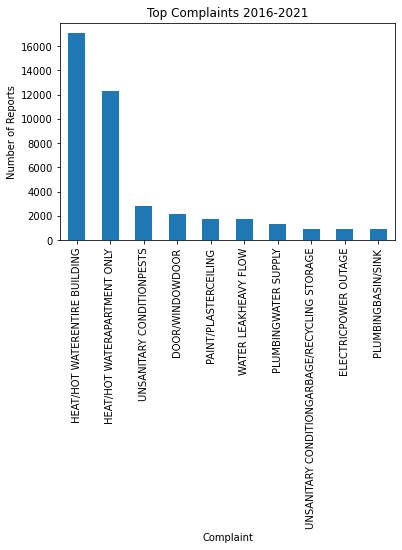

In [29]:
com_values5 = bv_5years["Complaints"].value_counts().head(10)
com_values5.plot(kind = "bar")
plt.title("Top Complaints 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Complaint")

The top 5 categories in the Complaints column in the last five years are "HEAT/HOT WATER - ENTIRE BUILDING", "HEAT/HOT WATER - APARTMENT ONLY", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR" and "PAINT/PLASTER - CEILING".

-------------------

Checking building IDs to see which is the most frequently show in the last five years.

In [30]:
bv_5years["BuildingID"].value_counts()

808361    3494
309623    716 
362955    606 
363119    484 
363333    425 
         ...  
287229    1   
344449    1   
892692    1   
359888    1   
364106    1   
Name: BuildingID, Length: 3933, dtype: int64

Text(0.5, 0, 'Building ID')

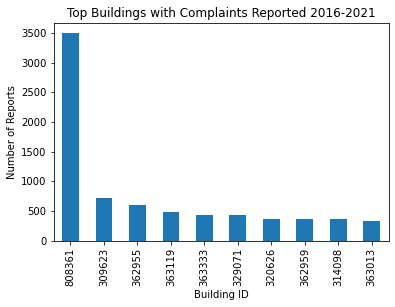

In [31]:
build_values5 = bv_5years["BuildingID"].value_counts().head(10)
build_values5.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported 2016-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
362955 - 165 Rockaway Parkway<br>
363119 - 214 Rockaway Parkway<br>
363333 - 92 Rockaway Parkway<br>
329071 - 210 Lott Avenue<br>
320626 - 9325 Kings Highway<br>
362959 - 166 Rockaway Parkway<br>
314098 - 351 Howard Avenue<br>
363013 - 178 Rockaway Parkway<br>

-------------

In this section, I will show the top buildings with violations in the 5 year timeframe.

In [32]:
bv_buildstatus5 = bv_5years[["BuildingID", "StatusDescription"]]

In [33]:
bv_sd5 = bv_buildstatus5[(bv_5years.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Building ID')

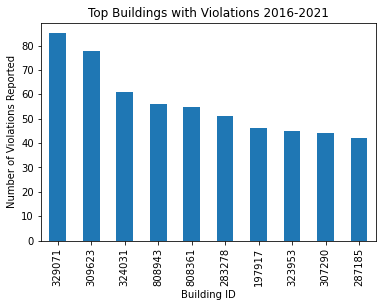

In [34]:
bv_sd_counts5 = bv_sd5["BuildingID"].value_counts().head(10)
bv_sd_counts5.plot(kind = "bar")
plt.title("Top Buildings with Violations 2016-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2016 and 2021 are:<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
324031 - 1087 Lenox Road<br>
808943 - 37 New Lots Avenue<br>
808361 - 1711 Fulton Street<br>
283278 - 480 East 94 Street<br>
197917 - 221 Bainbridge Street<br>
323953 - 351 Legion Street<br>
307290 - 668 Hancock Street<br>
378273 - 2327 Strauss Street<br>

------------

Checking the amounts of buildings that could not be accessed after complaints were made for this time frame.

In [35]:
bv_sd_noaccess5 = bv_buildstatus5[(bv_buildstatus5.StatusDescription == "Unable to gain access")]

Text(0.5, 0, 'Building ID')

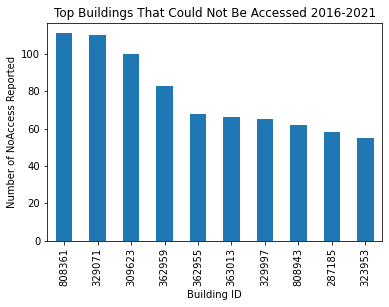

In [36]:
bv_sd_noaccess5_counts = bv_sd_noaccess5["BuildingID"].value_counts().head(10)
bv_sd_noaccess5_counts.plot(kind = "bar")
plt.title("Top Buildings That Could Not Be Accessed 2016-2021")
plt.ylabel("Number of NoAccess Reported")
plt.xlabel("Building ID")

The top buildings that could not be accessed after complaints were made between the years of 2016 and 2021 are:<br>
808361 - 1711 Fulton Street<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
362959 - 166 Rockaway Parkway<br>
362955 - 165 Rockaway Parkway<br>
363013 - 178 Rockaway Parkway<br>
329997 - 437 Macon Street<br>
808943 - 37 New Lots Avenue<br>
287185 - 1064 East New York Avenue<br>
323953 - 351 Legion Street<br>

--------------

Here we will look at which complaints are most commonly associated with issued violations for the years of 2016 to 2021. 

In [37]:
bv_complaintstatus5 = bv_5years[["Complaints", "StatusDescription"]]

In [38]:
bv_sd_comviolation5 = bv_complaintstatus5[(bv_complaintstatus5.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Complaints')

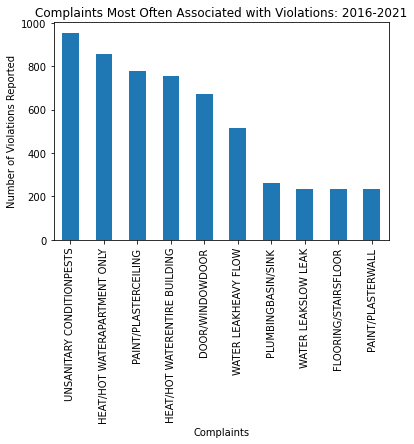

In [39]:
bv_sd_comviolation_counts5 = bv_sd_comviolation5["Complaints"].value_counts().head(10)
bv_sd_comviolation_counts5.plot(kind = "bar")
plt.title("Complaints Most Often Associated with Violations: 2016-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Complaints")

The most common complaints which lead to a violation being issued are "UNSANITARY CONDITIONS - PESTS", "HEAT/HOT WATER - APARTMENT ONLY", "PAINT/PLASTER - CEILING", "HEAT/HOT WATER - ENTIRE BUILDING" and "DOOR/WINDOW - DOOR".

---------

Here we will look at which complaints are most commonly associated with not being able to access the building for inspection in the years of 2016 to 2021. 

In [40]:
bv_sd_comnoaccess5 = bv_complaintstatus5[(bv_complaintstatus5.StatusDescription == 'Unable to gain access')]

Text(0.5, 0, 'Complaints')

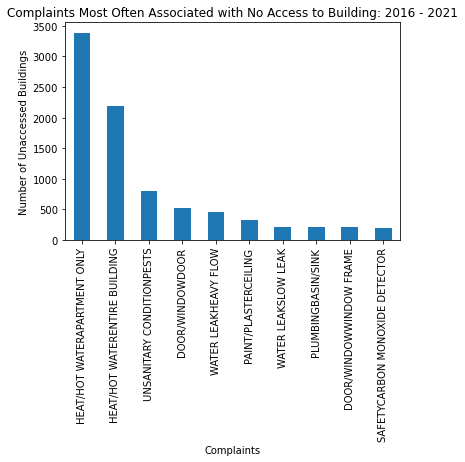

In [41]:
bv_sd_comnoaccess_counts5 = bv_sd_comnoaccess5["Complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts5.plot(kind = "bar")
plt.title("Complaints Most Often Associated with No Access to Building: 2016 - 2021")
plt.ylabel("Number of Unaccessed Buildings")
plt.xlabel("Complaints")

The most common complaints associated with not having access to a building for inspection are "HEAT/HOT WATER - APARTMENT ONLY", "HEAT/HOT WATER - ENTIRE BUILDING", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR" and "WATER LEAK - HEAVY FLOW". 

-------------

Looking at the amounts of complaints made each month between the years of 2016 to 2021. 

In [42]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_5years['StatusDate'] = pd.to_datetime(bv_5years['StatusDate'])
bv_5years["StatusDateMonth"] = bv_5years["StatusDate"].dt.month
month_counts5 = bv_5years["StatusDateMonth"].value_counts()
month_counts5.index = month_counts5.index.map(month)
month_counts5

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


January      7561
December     7220
February     6774
November     6332
March        5913
October      4284
April        3612
May          2728
July         2580
August       2545
September    2398
June         2312
Name: StatusDateMonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

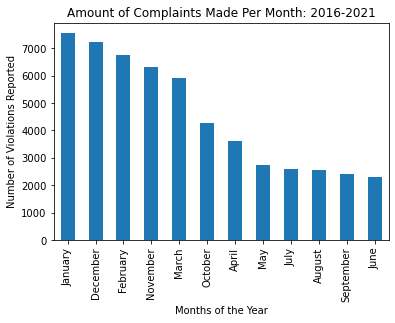

In [43]:
month_counts5.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2016-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Months of the Year")

As with the overall dataset time frame, the winter months are the ones with the highest amounts of complaints.

--------------------

-------------

## Part 3: 2 Year Analysis of Brownsville.csv, years 2019-2021

Filtered the years down to a two year time frame (between the years 2019 and 2021).

In [44]:
bv_2years = rdbrownsville[(rdbrownsville['StatusDate'] > '2019-01-01') & (rdbrownsville['StatusDate'] < '2021-05-01')]

----------------

Checking the Complaints column, now for a 2 year timeframe.

In [45]:
bv_2years["Complaints"].value_counts().head(10)

HEAT/HOT WATERENTIRE BUILDING                    6850
HEAT/HOT WATERAPARTMENT ONLY                     5094
UNSANITARY CONDITIONPESTS                        1381
DOOR/WINDOWDOOR                                  855 
WATER LEAKHEAVY FLOW                             782 
PAINT/PLASTERCEILING                             614 
PLUMBINGWATER SUPPLY                             513 
UNSANITARY CONDITIONGARBAGE/RECYCLING STORAGE    423 
WATER LEAKSLOW LEAK                              388 
APPLIANCEELECTRIC/GAS RANGE                      378 
Name: Complaints, dtype: int64

Text(0.5, 0, 'Complaint')

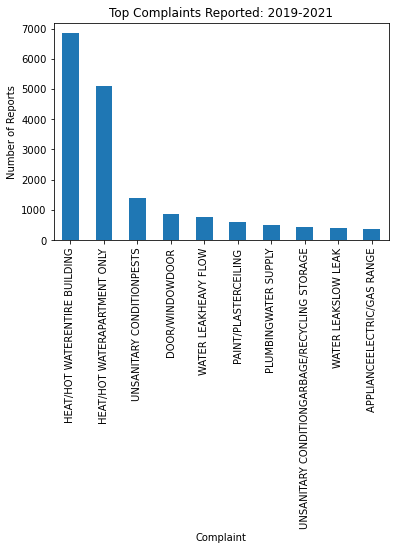

In [46]:
com_values2 = bv_2years["Complaints"].value_counts().head(10)
com_values2.plot(kind = "bar")
plt.title("Top Complaints Reported: 2019-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Complaint")

In the Complaints column, the top issues in the last two years are "HEAT/HOT WATER - ENTIRE BUILDING", "HEAT/HOT WATER - APARTMENT ONLY", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR" and "WATER LEAK - HEAVY FLOW".

---------------------------

Checking building IDs to see which is the most frequently show in the last two years.

In [47]:
bv_2years["BuildingID"].value_counts()

808361    1460
309623    398 
362955    331 
363333    239 
363244    215 
         ...  
283288    1   
376523    1   
983312    1   
863414    1   
364106    1   
Name: BuildingID, Length: 2504, dtype: int64

Text(0.5, 0, 'Building ID')

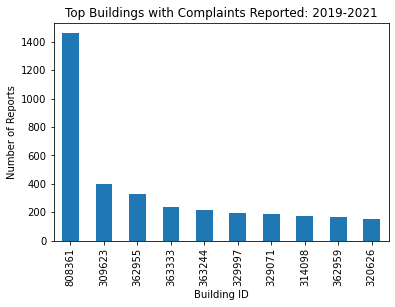

In [48]:
build_values2 = bv_2years["BuildingID"].value_counts().head(10)
build_values2.plot(kind = "bar")
plt.title("Top Buildings with Complaints Reported: 2019-2021")
plt.ylabel("Number of Reports")
plt.xlabel("Building ID")

The building with the most complaints in this version of the dataset are:<br>
808361 - 1711 Fulton Street<br>
309623 - 7 Hegeman Avenue<br>
362955 - 165 Rockaway Parkway<br>
363333 - 178 Rockaway Parkway<br>
363244 - 56 Rockaway Parkway<br>
329997 - 437 Macon Street<br>
329071 - 210 Lott Avenue<br>
314098 - 351 Howard Avenue<br>
362959 - 166 Rockaway Parkway<br>
320626 - 9325 Kings Highway<br>

------------------

In this section, I will show the top buildings with violations in the 2 year timeframe.

In [49]:
bv_buildstatus2 = bv_2years[["BuildingID", "StatusDescription"]]

In [50]:
bv_sd2 = bv_buildstatus2[(bv_2years.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Building ID')

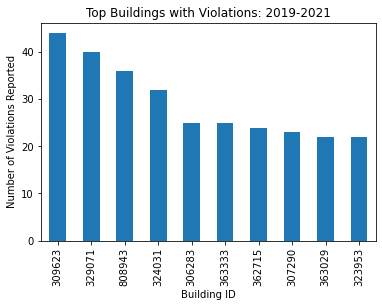

In [51]:
bv_sd_counts2 = bv_sd2["BuildingID"].value_counts().head(10)
bv_sd_counts2.plot(kind = "bar")
plt.title("Top Buildings with Violations: 2019-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Building ID")

The top buildings with code violations between the years of 2014 and 2021 are:<br>
309623 - 7 Hegeman Avenue<br>
329071 - 210 Lott Avenue<br>
808943 - 37 New Lots Avenue<br>
324031 - 1087 Lenox Road<br>
306283 - 829 Halsey Street<br>
363333 - 92 Rockaway Parkway<br>
362715 - 694 Rockaway Avenue<br>
307290 - 668 Hancock Street<br>
323953 - 351 Legion Street<br>
363029 - 181 Rockaway Parkway <br>

---------------------

Looking at the amount of buildings that could not be accessed after complaints were received.

In [52]:
bv_sd_noaccess2 = bv_buildstatus2[(bv_buildstatus2.StatusDescription == "Unable to gain access")]

Text(0.5, 0, 'Building ID')

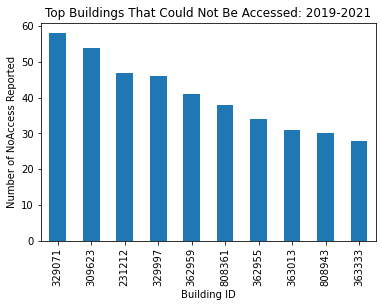

In [53]:
bv_sd_noaccess2_counts = bv_sd_noaccess2["BuildingID"].value_counts().head(10)
bv_sd_noaccess2_counts.plot(kind = "bar")
plt.title("Top Buildings That Could Not Be Accessed: 2019-2021")
plt.ylabel("Number of NoAccess Reported")
plt.xlabel("Building ID")

The top buildings that could not be accessed after complaints were made between the years of 2019 and 2021 are:<br>
329071 - 210 Lott Avenue<br>
309623 - 7 Hegeman Avenue<br>
231212 - 2411 Dean Street<br>
329997 - 437 Macon Street<br>
362959 - 166 Rockaway Parkway<br>
808361 - 1711 Fulton Street<br>
362955 - 165 Rockaway Parkway<br>
363013 - 178 Rockaway Parkway<br>
808943 - 37 New Lots Avenue<br>
297651 - 1933 Fulton Street<br>

---------

Here we will look at which complaints are most commonly associated with issued violations within the last 2 years. 

In [54]:
bv_complaintstatus2 = bv_2years[["Complaints", "StatusDescription"]]

In [55]:
bv_sd_comviolation2 = bv_complaintstatus2[(bv_complaintstatus2.StatusDescription == 'Inspected; violations issued')]

Text(0.5, 0, 'Complaints')

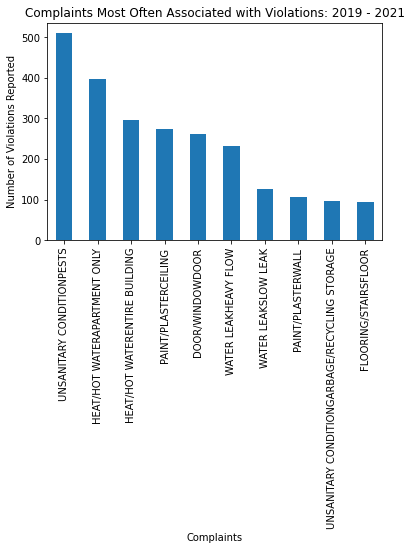

In [56]:
bv_sd_comviolation_counts2 = bv_sd_comviolation2["Complaints"].value_counts().head(10)
bv_sd_comviolation_counts2.plot(kind = "bar")
plt.title("Complaints Most Often Associated with Violations: 2019 - 2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Complaints")

The most common complaints which lead to a violation being issued are "UNSANITARY CONDITION - PESTS", "HEAT/HOT WATER - APARTMENT ONLY", "HEAT/HOT WATER - ENTIRE BUILDING", "PAINT/PLASTER - CEILING" and "DOOR/WINDOW - DOOR".

-------

Here we will look at which complaints are most commonly associated with not having access to the building for inspection in the 2 year time frame. 

In [57]:
bv_sd_comnoaccess2 = bv_complaintstatus2[(bv_complaintstatus2.StatusDescription == 'Unable to gain access')]

Text(0.5, 0, 'Complaints')

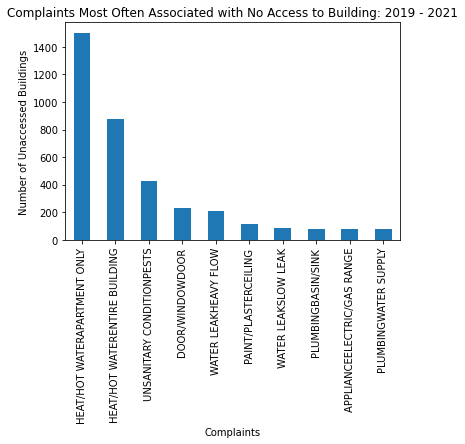

In [58]:
bv_sd_comnoaccess_counts2 = bv_sd_comnoaccess2["Complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts2.plot(kind = "bar")
plt.title("Complaints Most Often Associated with No Access to Building: 2019 - 2021")
plt.ylabel("Number of Unaccessed Buildings")
plt.xlabel("Complaints")

The most common complaints (MinorCategory column) which lead to a violation being issued are "HEAT/HOT WATER - APARTMENT ONLY", "HEAT/HOT WATER - ENTIRE BUILDING", "UNSANITARY CONDITION - PESTS", "DOOR/WINDOW - DOOR" and "WATER LEAK - HEAVY FLOW".

----------------

Looking at the amounts of complaints made per month. 

In [59]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_2years['StatusDate'] = pd.to_datetime(bv_2years['StatusDate'])
bv_2years["StatusDateMonth"] = bv_2years["StatusDate"].dt.month
month_counts2 = bv_2years["StatusDateMonth"].value_counts()
month_counts2.index = month_counts2.index.map(month)
month_counts2

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


January      3582
February     2937
December     2730
March        2682
November     2411
April        1615
October      1421
July         994 
August       955 
September    871 
May          834 
June         789 
Name: StatusDateMonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

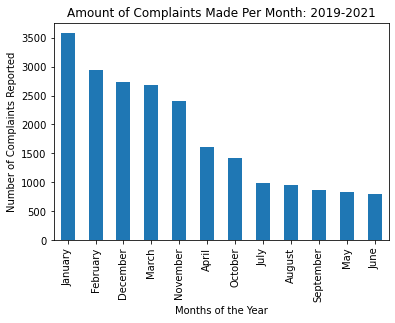

In [60]:
month_counts2.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2019-2021")
plt.ylabel("Number of Complaints Reported")
plt.xlabel("Months of the Year")

Consistent with what has been shown in the rest of the analysis, the winter months are the ones with the most complaints.

----------------